# Getting started with NeuroLogic programming

Basis of NeuroLogic programming is logic program (template) that is really similar to prolog program. Difference between Prolog program is that every rule or fact has its own weight and instead of discrete truth values True and False, NeuroLogic programming has continous truth values.

The template reflects the high-level structure of the resulting models and possibly some background knowledge about the problem. In Srabble for instance, we know that every letter affects the score of a word. To encode the knowledge, we use Horn clauses (also called rules).

Each rule is in the following format: 
$$
\require{color}
\newcommand{\af}[1]{\color{green}{\texttt{#1}}}
\newcommand{\we}[1]{\color{green}{\texttt{#1}}}
\newcommand{\br}[1]{\color{black}{\texttt{#1}}}
\newcommand{\co}[1]{\color{orange}{\texttt{#1}}}
\newcommand{\va}[1]{\color{red}{\texttt{#1}}}
\underbrace{\we{0.0}}_{\text{weight}}\texttt{ }\underbrace{\color{blue}{\texttt{score}}\color{black}{\texttt{()}}}_{\text{rule head}} \texttt{ :- }\underbrace{\color{blue}{\texttt{letter}}\color{black}{\texttt{(}}\color{orange}{\texttt{a}},\color{red}{\texttt{Positon}}\color{black}{\texttt{)}}}_{\text{rule tail}}. \underbrace{\br{[}\af{lukasiewicz}\br{]}}_{\text{activation function (optional)}}
$$
Weight of the rule is either learnable (then the weight represents the initial value for learning with the exception of $0.0$, where the initial weight value will be randomly generated) or fixed (fixed weights are enclosed in angle brackets).
In our sample scenario, we do not know the weight of any letter, and so every rule in this example will have learnable weight. The template we will use for this problem will look as follows.

### Template

In [ ]:
%%writefile scrabble_rules.pl 
0.0 score() :- letter(a,Position),range(List,a,z),member(Letter,List). [^Letter,identity]
score/0 [identity]

The training set consists of grounded rules. These rules act as examples to learn the right weights in the lifted (templated) model. Every example should be provable from the (learned) model. In this particular example, we know only scores for some words, the corresponding rules will be in the following format.
  $$
  \require{color}
  \newcommand{\af}[1]{\color{green}{\texttt{#1}}}
\newcommand{\we}[1]{\color{green}{\texttt{#1}}}
\newcommand{\br}[1]{\color{black}{\texttt{#1}}}
\newcommand{\co}[1]{\color{orange}{\texttt{#1}}}
\newcommand{\va}[1]{\color{red}{\texttt{#1}}}
\newcommand{\pr}[1]{\color{blue}{\texttt{#1}}}
     \underbrace{\we{7.0}}_{\text{desired output}}\texttt{ }\underbrace{\pr{score}\br{()}}_{\text{query}} \texttt{ :- }\underbrace{\pr{letter}\br{(}\co{h}\br{,}\co{1}\br{),}\pr{letter}\br{(}\co{i}\br{,}\co{2}\br{)}}_{\text{evidence}}\br{.}
  $$

For this particular task, traning set was generated from 78 random words.

### Training set

In [ ]:
%%writefile scrabble_training_set.pl
19 score() :- letter(m,1),letter(a,2),letter(l,3),letter(e,4),letter(d,5),letter(i,6),letter(c,7),letter(t,8),letter(o,9),letter(r,10),letter(y,11).
9  score() :- letter(t,1),letter(a,2),letter(n,3),letter(g,4),letter(i,5),letter(n,6),letter(g,7).
19 score() :- letter(v,1),letter(a,2),letter(g,3),letter(a,4),letter(b,5),letter(o,6),letter(n,7),letter(d,8),letter(a,9),letter(g,10),letter(e,11).
23 score() :- letter(b,1),letter(e,2),letter(j,3),letter(u,4),letter(m,5),letter(b,6),letter(l,7),letter(e,8),letter(d,9).
17 score() :- letter(p,1),letter(a,2),letter(d,3),letter(d,4),letter(l,5),letter(e,6),letter(b,7),letter(a,8),letter(l,9),letter(l,10),letter(s,11).
13 score() :- letter(b,1),letter(i,2),letter(o,3),letter(a,4),letter(s,5),letter(s,6),letter(a,7),letter(y,8).
21 score() :- letter(f,1),letter(i,2),letter(a,3),letter(n,4),letter(c,5),letter(h,6),letter(e,7),letter(t,8),letter(t,9),letter(o,10),letter(e,11),letter(d,12).
16 score() :- letter(s,1),letter(u,2),letter(c,3),letter(c,4),letter(o,5),letter(t,6),letter(a,7),letter(s,8),letter(h,9).
18 score() :- letter(u,1),letter(n,2),letter(p,3),letter(i,4),letter(c,5),letter(k,6),letter(i,7),letter(n,8),letter(g,9).
20 score() :- letter(b,1),letter(i,2),letter(l,3),letter(d,4),letter(u,5),letter(n,6),letter(g,7),letter(s,8),letter(r,9),letter(o,10),letter(m,11),letter(a,12),letter(n,13),letter(e,14).
24 score() :- letter(d,1),letter(e,2),letter(h,3),letter(y,4),letter(d,5),letter(r,6),letter(o,7),letter(g,8),letter(e,9),letter(n,10),letter(a,11),letter(t,12),letter(i,13),letter(o,14),letter(n,15).
16 score() :- letter(d,1),letter(o,2),letter(w,3),letter(n,4),letter(f,5),letter(a,6),letter(l,7),letter(l,8),letter(s,9).
11 score() :- letter(m,1),letter(o,2),letter(p,3),letter(e,4),letter(d,5),letter(s,6).
21 score() :- letter(e,1),letter(v,2),letter(o,3),letter(c,4),letter(a,5),letter(t,6),letter(i,7),letter(v,8),letter(e,9),letter(n,10),letter(e,11),letter(s,12),letter(s,13).
22 score() :- letter(c,1),letter(h,2),letter(a,3),letter(f,4),letter(f,5),letter(e,6),letter(r,7),letter(i,8),letter(n,9),letter(g,10).
27 score() :- letter(f,1),letter(l,2),letter(i,3),letter(b,4),letter(b,5),letter(e,6),letter(r,7),letter(t,8),letter(i,9),letter(g,10),letter(i,11),letter(b,12),letter(b,13),letter(e,14),letter(t,15).
16 score() :- letter(a,1),letter(f,2),letter(t,3),letter(e,4),letter(r,5),letter(w,6),letter(a,7),letter(r,8),letter(d,9).
22 score() :- letter(i,1),letter(n,2),letter(f,3),letter(l,4),letter(a,5),letter(m,6),letter(m,7),letter(a,8),letter(t,9),letter(o,10),letter(r,11),letter(y,12).
17 score() :- letter(o,1),letter(l,2),letter(i,3),letter(g,4),letter(a,5),letter(r,6),letter(c,7),letter(h,8),letter(i,9),letter(e,10),letter(s,11).
12 score() :- letter(n,1),letter(i,2),letter(t,3),letter(r,4),letter(o,5),letter(g,6),letter(e,7),letter(n,8),letter(a,9),letter(s,10),letter(e,11).
18 score() :- letter(s,1),letter(o,2),letter(m,3),letter(a,4),letter(t,5),letter(o,6),letter(l,7),letter(o,8),letter(g,9),letter(i,10),letter(c,11),letter(a,12),letter(l,13).
15 score() :- letter(h,1),letter(i,2),letter(g,3),letter(h,4),letter(t,5),letter(a,6),letter(i,7),letter(l,8).
18 score() :- letter(c,1),letter(h,2),letter(i,3),letter(m,4),letter(a,5),letter(e,6),letter(r,7),letter(i,8),letter(c,9).
15 score() :- letter(c,1),letter(h,2),letter(o,3),letter(p,4),letter(i,5),letter(n,6),letter(e,7),letter(s,8).
14 score() :- letter(m,1),letter(e,2),letter(d,3),letter(i,4),letter(c,5),letter(a,6),letter(i,7),letter(d,8).
14 score() :- letter(m,1),letter(o,2),letter(l,3),letter(e,4),letter(s,5),letter(k,6),letter(i,7),letter(n,8).
15 score() :- letter(m,1),letter(u,2),letter(l,3),letter(t,4),letter(i,5),letter(e,6),letter(n,7),letter(g,8),letter(i,9),letter(n,10),letter(e,11),letter(s,12).
19 score() :- letter(j,1),letter(e,2),letter(r,3),letter(e,4),letter(m,5),letter(i,6),letter(a,7),letter(d,8),letter(s,9).
20 score() :- letter(r,1),letter(e,2),letter(e,3),letter(j,4),letter(e,5),letter(c,6),letter(t,7),letter(i,8),letter(n,9),letter(g,10).
29 score() :- letter(s,1),letter(t,2),letter(o,3),letter(c,4),letter(k,5),letter(j,6),letter(o,7),letter(b,8),letter(b,9),letter(e,10),letter(r,11),letter(s,12).
15 score() :- letter(p,1),letter(i,2),letter(k,3),letter(e,4),letter(m,5),letter(a,6),letter(n,7).
15 score() :- letter(d,1),letter(i,2),letter(b,3),letter(b,4),letter(u,5),letter(k,6).
17 score() :- letter(b,1),letter(l,2),letter(o,3),letter(c,4),letter(k,5),letter(i,6),letter(e,7),letter(s,8),letter(t,9).
10 score() :- letter(s,1),letter(w,2),letter(o,3),letter(l,4),letter(l,5),letter(e,6),letter(n,7).
13 score() :- letter(s,1),letter(y,2),letter(l,3),letter(p,4),letter(h,5).
14 score() :- letter(s,1),letter(a,2),letter(g,3),letter(i,4),letter(t,5),letter(t,6),letter(a,7),letter(l,8),letter(l,9),letter(y,10).
5  score() :- letter(m,1),letter(o,2),letter(n,3).
12 score() :- letter(m,1),letter(a,2),letter(s,3),letter(h,4),letter(e,5),letter(d,6).
29 score() :- letter(c,1),letter(y,2),letter(t,3),letter(o,4),letter(p,5),letter(h,6),letter(o,7),letter(t,8),letter(o,9),letter(m,10),letter(e,11),letter(t,12),letter(r,13),letter(i,14),letter(c,15).
14 score() :- letter(b,1),letter(o,2),letter(n,3),letter(e,4),letter(y,5),letter(a,6),letter(r,7),letter(d,8).
17 score() :- letter(h,1),letter(a,2),letter(n,3),letter(d,4),letter(y,5),letter(m,6),letter(a,7),letter(n,8).
15 score() :- letter(t,1),letter(e,2),letter(c,3),letter(h,4),letter(n,5),letter(i,6),letter(c,7),letter(s,8).
28 score() :- letter(m,1),letter(a,2),letter(g,3),letter(n,4),letter(i,5),letter(l,6),letter(o,7),letter(q,8),letter(u,9),letter(e,10),letter(n,11),letter(c,12),letter(e,13),letter(s,14).
14 score() :- letter(e,1),letter(r,2),letter(g,3),letter(o,4),letter(t,5),letter(a,6),letter(m,7),letter(i,8),letter(n,9),letter(e,10),letter(s,11).
9  score() :- letter(o,1),letter(r,2),letter(g,3),letter(a,4),letter(s,5),letter(m,6).
24 score() :- letter(t,1),letter(r,2),letter(a,3),letter(n,4),letter(s,5),letter(p,6),letter(l,7),letter(a,8),letter(n,9),letter(t,10),letter(a,11),letter(b,12),letter(i,13),letter(l,14),letter(i,15),letter(t,16),letter(y,17).
12 score() :- letter(m,1),letter(o,2),letter(p,3),letter(e,4),letter(r,5),letter(i,6),letter(e,7),letter(s,8).
22 score() :- letter(i,1),letter(c,2),letter(o,3),letter(n,4),letter(o,5),letter(g,6),letter(r,7),letter(a,8),letter(p,9),letter(h,10),letter(i,11),letter(c,12).
23 score() :- letter(s,1),letter(q,2),letter(u,3),letter(e,4),letter(a,5),letter(k,6),letter(y,7).
18 score() :- letter(m,1),letter(a,2),letter(r,3),letter(q,4),letter(u,5),letter(e,6),letter(s,7).
27 score() :- letter(q,1),letter(u,2),letter(i,3),letter(c,4),letter(k,5),letter(s,6),letter(t,7),letter(e,8),letter(p,9),letter(s,10).
17 score() :- letter(c,1),letter(l,2),letter(o,3),letter(b,4),letter(b,5),letter(e,6),letter(r,7),letter(i,8),letter(n,9),letter(g,10).
17 score() :- letter(u,1),letter(n,2),letter(d,3),letter(e,4),letter(r,5),letter(c,6),letter(o,7),letter(a,8),letter(t,9),letter(i,10),letter(n,11),letter(g,12),letter(s,13).
12 score() :- letter(w,1),letter(r,2),letter(o,3),letter(n,4),letter(g,5),letter(e,6),letter(d,7).
16 score() :- letter(n,1),letter(o,2),letter(n,3),letter(r,4),letter(e,5),letter(s,6),letter(p,7),letter(o,8),letter(n,9),letter(d,10),letter(e,11),letter(n,12),letter(t,13).
12 score() :- letter(b,1),letter(e,2),letter(a,3),letter(s,4),letter(t,5),letter(i,6),letter(n,7),letter(g,8),letter(s,9).
24 score() :- letter(s,1),letter(q,2),letter(u,3),letter(e,4),letter(l,5),letter(c,6),letter(h,7),letter(e,8),letter(d,9).
18 score() :- letter(p,1),letter(u,2),letter(l,3),letter(s,4),letter(o,5),letter(j,6),letter(e,7),letter(t,8),letter(s,9).
13 score() :- letter(o,1),letter(u,2),letter(t,3),letter(f,4),letter(l,5),letter(e,6),letter(w,7).
8  score() :- letter(p,1),letter(l,2),letter(a,3),letter(n,4),letter(e,5),letter(t,6).
18 score() :- letter(s,1),letter(o,2),letter(u,3),letter(t,4),letter(h,5),letter(w,6),letter(e,7),letter(s,8),letter(t,9),letter(e,10),letter(r,11),letter(n,12).
16 score() :- letter(h,1),letter(e,2),letter(a,3),letter(d,4),letter(h,5),letter(u,6),letter(n,7),letter(t,8),letter(s,9).
32 score() :- letter(m,1),letter(e,2),letter(s,3),letter(e,4),letter(m,5),letter(b,6),letter(r,7),letter(y,8),letter(a,9),letter(n,10),letter(t,11),letter(h,12),letter(e,13),letter(m,14),letter(u,15),letter(m,16).
20 score() :- letter(i,1),letter(n,2),letter(t,3),letter(e,4),letter(r,5),letter(v,6),letter(a,7),letter(l,8),letter(o,9),letter(m,10),letter(e,11),letter(t,12),letter(e,13),letter(r,14),letter(s,15).
12 score() :- letter(g,1),letter(r,2),letter(e,3),letter(a,4),letter(v,5),letter(e,6),letter(d,7).
20 score() :- letter(f,1),letter(a,2),letter(c,3),letter(i,4),letter(l,5),letter(i,6),letter(t,7),letter(a,8),letter(t,9),letter(i,10),letter(v,11),letter(e,12).
14 score() :- letter(p,1),letter(r,2),letter(e,3),letter(d,4),letter(a,5),letter(w,6),letter(n,7),letter(s,8).
13 score() :- letter(w,1),letter(e,2),letter(l,3),letter(f,4),letter(a,5),letter(r,6),letter(e,7).
8  score() :- letter(s,1),letter(w,2),letter(a,3),letter(g,4).
21 score() :- letter(b,1),letter(a,2),letter(n,3),letter(d,4),letter(b,5),letter(o,6),letter(x,7),letter(e,8),letter(s,9).
23 score() :- letter(p,1),letter(e,2),letter(m,3),letter(p,4),letter(h,5),letter(i,6),letter(x,7).
14 score() :- letter(r,1),letter(e,2),letter(l,3),letter(a,4),letter(x,5),letter(i,6),letter(n,7).
28 score() :- letter(k,1),letter(y,2),letter(m,3),letter(o,4),letter(g,5),letter(r,6),letter(a,7),letter(p,8),letter(h,9),letter(i,10),letter(c,11).
30 score() :- letter(h,1),letter(y,2),letter(p,3),letter(e,4),letter(r,5),letter(e,6),letter(x,7),letter(t,8),letter(e,9),letter(n,10),letter(d,11),letter(e,12),letter(d,13).
24 score() :- letter(c,1),letter(l,2),letter(i,3),letter(t,4),letter(o,5),letter(r,6),letter(i,7),letter(d,8),letter(e,9),letter(c,10),letter(t,11),letter(o,12),letter(m,13),letter(y,14).
16 score() :- letter(d,1),letter(i,2),letter(t,3),letter(z,4),letter(e,5),letter(s,6).
21 score() :- letter(t,1),letter(e,2),letter(n,3),letter(d,4),letter(e,5),letter(r,6),letter(i,7),letter(z,8),letter(e,9),letter(d,10).
26 score() :- letter(p,1),letter(a,2),letter(r,3),letter(a,4),letter(m,5),letter(e,6),letter(t,7),letter(e,8),letter(r,9),letter(i,10),letter(z,11),letter(e,12),letter(s,13).

# Setup & Learning phase (may take a while to finish)


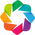

In [1]:
from neurologic import run, plot_statistics, learned_template, display_neural_nets
import holoviews as hv
from IPython.display import display_svg
hv.notebook_extension('bokeh')
%load_ext autoreload
%autoreload 2

In [2]:
%logstart
#output = run("scrabble_rules.pl","scrabble_training_set.pl",grounding="sum")
# If the learning phase is done
output = "./outputs/"

Activating auto-logging. Current session state plus future input saved.
Filename       : ipython_log.py
Mode           : rotate
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


The w

# Results: Learning curve

In [3]:
%%opts Curve [width=725 height=400]
plot_statistics(output)

:DynamicMap   [fold,restart,error type]

# Results: Learned template

In [4]:
print(learned_template(output))

5.000000000000000 score(a) :- straight(5).
4.000000000000000 score(a) :- straight(4).
3.000000000000000 score(a) :- straight(3).
0.028214306559451 cardFromGroup(5,Position) :- card(Position,5,spades).
-0.077682533337182 cardFromGroup(4,Position) :- card(Position,5,spades).
-0.107587110777089 cardFromGroup(3,Position) :- card(Position,5,spades).
0.007255280245345 cardFromGroup(2,Position) :- card(Position,5,spades).
-0.044209382485792 cardFromGroup(5,Position) :- card(Position,5,clubs).
-0.189016488152916 cardFromGroup(4,Position) :- card(Position,5,clubs).
0.124997048186925 cardFromGroup(3,Position) :- card(Position,5,clubs).
-0.041585402893142 cardFromGroup(2,Position) :- card(Position,5,clubs).
-0.097570742848824 cardFromGroup(5,Position) :- card(Position,5,diamonds).
-0.157260703454614 cardFromGroup(4,Position) :- card(Position,5,diamonds).
-0.116841625838388 cardFromGroup(3,Position) :- card(Position,5,diamonds).
0.101624073117556 cardFromGroup(2,Position) :- card(Position,5,diamon

# Results: Neural networks

In [5]:
display_neural_nets(output)

A Jupyter Widget

<function neurologic.neurologic._display_neural_nets_ipywidgets.<locals>.<lambda>>

If you want to explore the how does the template reacts throughout learning, you can use network response tool.

# Network Response